# Bee Colony Data

Using the Bee Colony Statistical Dataset saved from Data.world*, I've arranged the data based on yearly inventory numbers to plot and track bee colony decline over a 30 year period. I've calculated the trendline in order to estimate the possible decline in colony numbers over the next 10 years.

*Griffith, B. (2018b). “Bee Colony Statistical Data from 1987 – 2017.” Data.world. https://data.world/finley/bee-colony-statistical-data-from-1987-2017

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("bee_colony_survey_data_by_state.csv")

In [3]:
df

,year,period,week_ending,state,state_ansi,watershed,data_item,value,cv
0,2017,JAN THRU MAR,NaN,ALABAMA,1,NaN,ADDED & REPLACED,570,NaN
1,2017,JAN THRU MAR,NaN,ARIZONA,4,NaN,ADDED & REPLACED,2900,NaN
2,2017,JAN THRU MAR,NaN,ARKANSAS,5,NaN,ADDED & REPLACED,430,NaN
3,2017,JAN THRU MAR,NaN,CALIFORNIA,6,NaN,ADDED & REPLACED,215000,NaN
4,2017,JAN THRU MAR,NaN,COLORADO,8,NaN,ADDED & REPLACED,100,NaN
...,...,...,...,...,...,...,...,...,...
3391,1987,MARKETING YEAR,NaN,VIRGINIA,51,NaN,INVENTORY,25000,NaN
3392,1987,MARKETING YEAR,NaN,WASHINGTON,53,NaN,INVENTORY,75000,NaN
3393,1987,MARKETING YEAR,NaN,WEST VIRGINIA,54,NaN,INVENTORY,21000,NaN
3394,1987,MARKETING YEAR,NaN,WISCONSIN,55,NaN,INVENTORY,92000,NaN


# Cleaning the dataset

The data shows different periods of time, some full year and some quarterly, and different data items, some inventory and some adding/removing.

In [4]:
print(df['period'].unique())
print()
print(df['data_item'].unique())
print()

['JAN THRU MAR' 'APR THRU JUN' 'JUL THRU SEP' 'OCT THRU DEC'
 'MARKETING YEAR' 'FIRST OF JAN' 'FIRST OF APR' 'FIRST OF JUL'
 'FIRST OF OCT']

['ADDED & REPLACED' 'INVENTORY, MAX' 'LOSS, COLONY COLLAPSE DISORDER'
 'LOSS, DEADOUT' 'INVENTORY']



We're just interested in taking the full inventory for each year, totalled for the whole USA:

In [5]:
marketing_year = df[df['period']=='MARKETING YEAR']
marketing_year

,year,period,week_ending,state,state_ansi,watershed,data_item,value,cv
1618,2017,MARKETING YEAR,NaN,ALABAMA,1,NaN,INVENTORY,7000,NaN
1619,2017,MARKETING YEAR,NaN,ARIZONA,4,NaN,INVENTORY,22000,NaN
1620,2017,MARKETING YEAR,NaN,ARKANSAS,5,NaN,INVENTORY,29000,NaN
1621,2017,MARKETING YEAR,NaN,CALIFORNIA,6,NaN,INVENTORY,335000,NaN
1622,2017,MARKETING YEAR,NaN,COLORADO,8,NaN,INVENTORY,33000,NaN
...,...,...,...,...,...,...,...,...,...
3391,1987,MARKETING YEAR,NaN,VIRGINIA,51,NaN,INVENTORY,25000,NaN
3392,1987,MARKETING YEAR,NaN,WASHINGTON,53,NaN,INVENTORY,75000,NaN
3393,1987,MARKETING YEAR,NaN,WEST VIRGINIA,54,NaN,INVENTORY,21000,NaN
3394,1987,MARKETING YEAR,NaN,WISCONSIN,55,NaN,INVENTORY,92000,NaN


**marketing_year** holds the data for the total inventory (number of colonies) for each state in each year. We can group by the *Year* column to get the total colony numbers for the entire USA for the year:

In [6]:
year_and_total = marketing_year.groupby('year').value.sum()
year_and_total

year
1987    3316000
1988    3370000
1989    3528000
1990    3220000
1991    3199000
1992    3036000
1993    2866000
1994    2777000
1995    2647000
1996    2574000
1997    2617000
1998    2621000
1999    2637000
2000    2604000
2001    2542000
2002    2565000
2003    2591000
2004    2539000
2005    2394000
2006    2378000
2007    2428000
2008    2326000
2009    2472000
2010    2666000
2011    2466000
2012    2509000
2013    2607000
2014    2709000
2015    2630000
2016    2740000
2017    2635000
Name: value, dtype: int64

Checking that the values match what we expect:

In [7]:
marketing_year[marketing_year['year'] == 2017].value.sum()

2635000

# Plotting the data

Using the bokeh library, I've plotted the **year_and_total** data onto an interactive graph. The bokeh plot opens a new HTML file, scatter.html, that shows an interactive scatter plot with a linear trend line.

In [8]:
from bokeh.plotting import figure 
from bokeh.io import output_file, show
from bokeh.models import HoverTool, ColumnDataSource

In [9]:
output_file("scatter.html")
f=figure(plot_width=800)

# get x and y values for the plot, year and total colonies (in millions)
x=year_and_total.index
y=year_and_total.values/1000000

cds = ColumnDataSource(data=dict(
    x=x,
    y=y,
    total=year_and_total.values,
    year=year_and_total.index
))

# setting labels and design of the plot
c1=f.circle(x='x',y='y',size=8,source=cds)
l1=f.line(x='x',y='y',source=cds) 

f.title.text="Bee Colonies in the USA from 1987-2017" 
f.xaxis.axis_label="Year"
f.yaxis.axis_label="Bee Colonies (Millions)"
f.xaxis.ticker = [y for y in year_and_total.index if y%2==1]

hover = HoverTool(renderers=[c1,l1],tooltips=[("Year","@year"),("Total", "@total")])
f.add_tools(hover)

# creating a polynomial fit to plot the trendline on the graph
par = np.polyfit(x, y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
y_predicted = [slope*i + intercept  for i in x]
f.line(x,y_predicted,color='red',legend='y='+str(round(slope,4))+'x+'+str(round(intercept,2)))

show(f)

Example output:

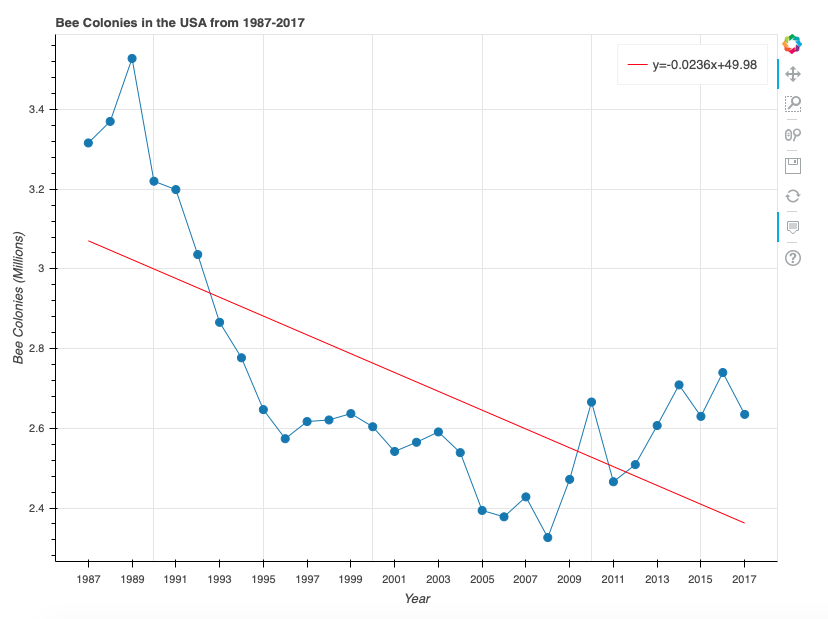

In [10]:
print(slope)
print(intercept)

-0.023609274193548132
49.982186290322055
